<h3>Loading and displaying all European Soudal plants</h3>
<blockquote>The script loads the geopandas module. The module is first used for loading the csv containing the European plants. A GeoDataFrame is then created, with the x and y being defined so the rows in the Geodataframe can be displayed onto a map. Defining an x and y column is mandatory for Geodataframes and the geopandas module.</blockquote>

In [158]:
import geopandas as gpd
gdf = gpd.read_file("Soudal_location.csv")
gdf = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf['x-coordinate'], gdf['y-coordinate']))
gdf.crs = 'epsg:4326'
display(gdf)

,ID,Country,City,Plant type,ZIP code,Receiving_plant,x-coordinate,y-coordinate,geometry
0,1,Portugal,Lissabon,Receiving plant,2710-207,2200,-9.369216,38.757301,POINT (-9.36922 38.75730)
1,2,Spain,Alovera,Receiving plant,19208,1900,-3.243162431,40.57675934,POINT (-3.24316 40.57676)
2,3,Italy,Cologno Monzese,Receiving plant,20093,2000,9.281575673,45.54113003,POINT (9.28158 45.54113)
3,4,France,Blyes,Receiving plant,1150,1800,5.261173337,45.83747369,POINT (5.26117 45.83747)
4,5,Belgium,Turnhout,Producing plant,2300,2300,4.928540898,51.29525785,POINT (4.92854 51.29526)
5,6,Latvia,Dobele,Producing plant,3701,3701,23.30237845,56.62518423,POINT (23.30238 56.62518)
6,7,Poland,Pionki,Producing plant,26-670,26-670,21.45811508,51.46902482,POINT (21.45812 51.46902)
7,8,Portugal,Lissabon,Producing plant,2710-207,2200,-9.369216,38.757301,POINT (-9.36922 38.75730)
8,9,Slovenia,Srpenica,Producing plant,5224,5224,13.5166732,46.28409136,POINT (13.51667 46.28409)
9,10,Spain,Alovera,Producing plant,19208,1900,-3.243162431,40.57675934,POINT (-3.24316 40.57676)


<h3>Loading all Soudal customers. WORK IN PROGRESS!!</h3>

In [151]:
import pandas as pd
df = pd.read_csv("C:/Users/michi/Documents/Blok 2 Jaar 4/Postal_points_csv.csv")
df = df.set_index('fid')
df = df.drop_duplicates(subset=['postalcodes'])
display(df)
df2 = pd.read_csv("C:/Users/michi/Documents/Blok 2 Jaar 4/Customers_orders 1.csv", sep=',')
df2 = df2.set_index('fid')
df2 = df2.drop_duplicates(subset=['postalcodes'])
display(df2)

,POSTCODE,CNTR_ID,postalcodes,x,y
fid,,,,,
1,1074,DK,DK_1074,12.583633,55.679565
2,1111,DK,DK_1111,12.580963,55.681969
3,1115,DK,DK_1115,12.578370,55.681033
4,1120,DK,DK_1120,12.578612,55.682419
5,1122,DK,DK_1122,12.579583,55.682525
...,...,...,...,...,...
808419,768 05,CZ,CZ_768 05,17.185137,49.139282
808420,793 44,CZ,CZ_793 44,17.200060,49.899448
808421,793 51,CZ,CZ_793 51,17.310940,49.861829


,Plant,Quantity_Delivered,Customer_ZIP,Customer_Country,postalcodes
fid,,,,,
1,2000,24,20091,IT,IT_20091
2,2200,16,2530-094,PT,PT_2530-094
3,1800,2,34540,FR,FR_34540
4,1800,1,84120,FR,FR_84120
5,2200,12,3885-809,PT,PT_3885-809
...,...,...,...,...,...
797624,2200,2,3680-142,PT,PT_3680-142
798478,2200,2,2460-302,PT,PT_2460-302
799959,2200,1,2800-260,PT,PT_2800-260


In [4]:
df.postalcodes.astype(str)
df2.postalcodes.astype(str)
finaldf = pd.merge(df, df2, on='postalcodes')
display(finaldf)
finaldf.to_csv("C:/Users/michi/Documents/Blok 2 Jaar 4/customers.csv")

,POSTCODE,CNTR_ID,postalcodes,x,y,Plant,Quantity_Delivered,Customer_ZIP,Customer_Country
0,16153,IT,IT_16153,8.856824,44.433111,2000,84,16153,IT
1,16038,IT,IT_16038,9.205905,44.333659,2000,24,16038,IT
2,47043,IT,IT_47043,12.400370,44.135109,2000,120,47043,IT
3,12045,IT,IT_12045,7.724159,44.551239,2000,12,12045,IT
4,12012,IT,IT_12012,7.553786,44.328486,2000,0,12012,IT
...,...,...,...,...,...,...,...,...,...
3386,8398,ES,ES_8398,2.710937,41.640498,1900,12,8398,ES
3387,9199,ES,ES_9199,-3.483225,42.334887,1900,6,9199,ES
3388,9240,ES,ES_9240,-3.325379,42.550646,1900,120,9240,ES
3389,9200,ES,ES_9200,-2.943871,42.684953,1900,48,9200,ES


PermissionError: [Errno 13] Permission denied: 'C:/Users/michi/Documents/Blok 2 Jaar 4/customers.csv'

<h3>Displaying all Soudal plants onto a map</h3>
<blockquote>The folium module can be used to generate interactive maps. Two folium functions are used. The first function generates a map with a variable named m. A simple for loop is then created to iterate over each row in the GeoDataFrame. Each row gets some popup content. Finally a second function is used to generate a marker for each row in the GeoDataFrame using the x and y coordinates.</blockquote>

In [155]:
import folium
m = folium.Map(location=[20, 0], zoom_start=3, height=500)
for i in range(len(gdf)):
    popup_content = f"<b>{gdf.iloc[i]['City']}</b>:<br>{gdf.iloc[i]['Plant type']}"
    folium.Marker(location=[gdf.iloc[i]['y-coordinate'], gdf.iloc[i]['x-coordinate']], popup=popup_content).add_to(m)
m

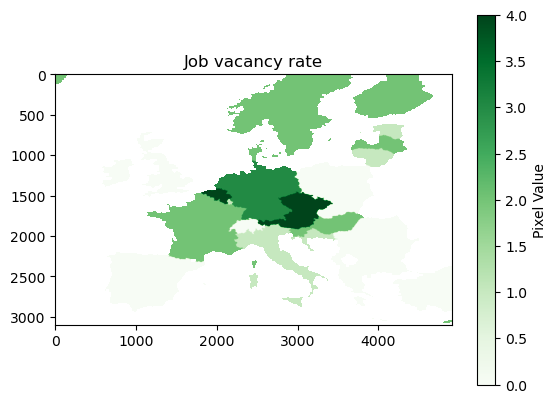

In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
   
file_path = 'C:/BO Soudal/Data/Rasters/Aligned_rasters/Job_vacancy_align2.tif'
with rasterio.open(file_path) as src:
    raster_data = src.read(1)
    nodata = -3.40282347e+38
   
    mask = np.isclose(raster_data, nodata)
    jobvacancy_raster = np.ma.masked_array(raster_data, mask)
    
plt.imshow(jobvacancy_raster, cmap = 'Greens')
plt.colorbar(label = 'Pixel Value')
plt.title('Job vacancy rate')
plt.show()

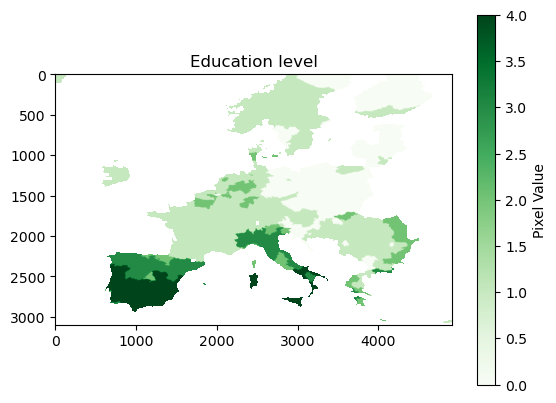

In [2]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
   
file_path = 'C:/BO Soudal/Data/Rasters/Aligned_rasters/Education_align.tif'
with rasterio.open(file_path) as src:
    raster_data = src.read(1)
    nodata = -3.40282347e+38
   
    mask = np.isclose(raster_data, nodata)
    education_raster = np.ma.masked_array(raster_data, mask)
    
plt.imshow(education_raster, cmap = 'Greens')
plt.colorbar(label = 'Pixel Value')
plt.title('Education level')
plt.show()

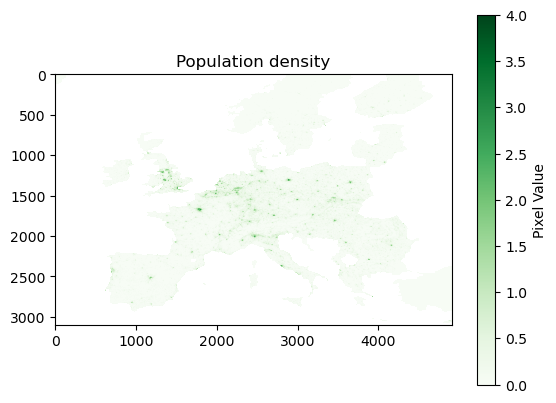

In [4]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
   
file_path = 'C:/BO Soudal/Data/Rasters/Aligned_rasters/Population_align4.tif'
with rasterio.open(file_path) as src:
    raster_data = src.read(1)
    nodata = -3.40282347e+38
   
    mask = np.isclose(raster_data, nodata)
    population_raster = np.ma.masked_array(raster_data, mask)
    
plt.imshow(population_raster, cmap = 'Greens')
plt.colorbar(label = 'Pixel Value')
plt.title('Population density')
plt.show()

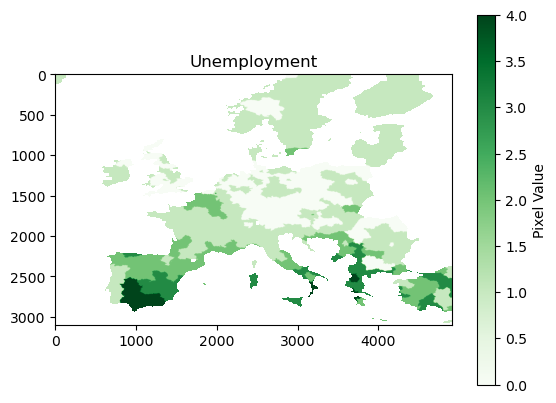

In [5]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
   
file_path = 'C:/BO Soudal/Data/Rasters/Aligned_rasters/unemployment_align.tif'
with rasterio.open(file_path) as src:
    raster_data = src.read(1)
    nodata = -3.40282347e+38
   
    mask = np.isclose(raster_data, nodata)
    unemployment_raster = np.ma.masked_array(raster_data, mask)
    
plt.imshow(unemployment_raster, cmap = 'Greens')
plt.colorbar(label = 'Pixel Value')
plt.title('Unemployment')
plt.show()

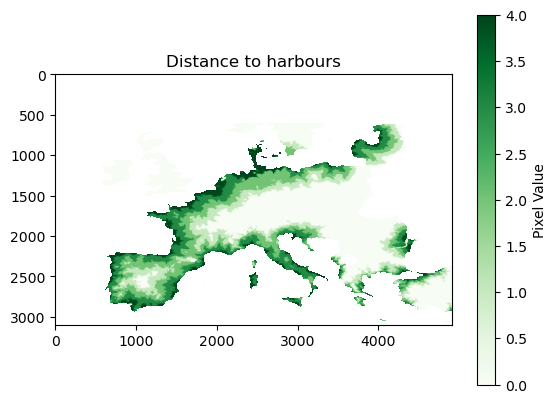

In [6]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
   
file_path = 'C:/BO Soudal/Data/Rasters/Aligned_rasters/Harbour_distance_align.tif'
with rasterio.open(file_path) as src:
    raster_data = src.read(1)
    nodata = -3.40282347e+38
   
    mask = np.isclose(raster_data, nodata)
    harbour_raster = np.ma.masked_array(raster_data, mask)
    
plt.imshow(harbour_raster, cmap = 'Greens')
plt.colorbar(label = 'Pixel Value')
plt.title('Distance to harbours')
plt.show()

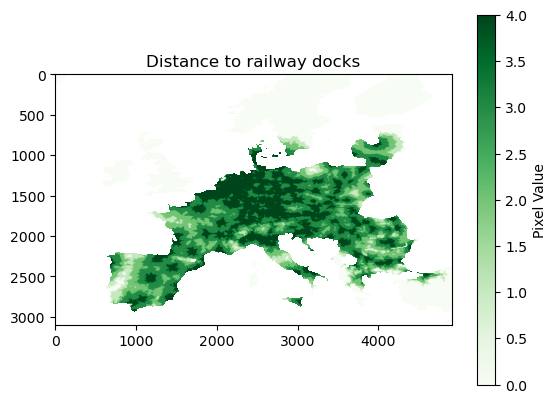

In [7]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
   
file_path = 'C:/BO Soudal/Data/Rasters/Aligned_rasters/railway_dock_distance_align.tif'
with rasterio.open(file_path) as src:
    raster_data = src.read(1)
    nodata = -3.40282347e+38
   
    mask = np.isclose(raster_data, nodata)
    railway_raster = np.ma.masked_array(raster_data, mask)
    
plt.imshow(railway_raster, cmap = 'Greens')
plt.colorbar(label = 'Pixel Value')
plt.title('Distance to railway docks')
plt.show()

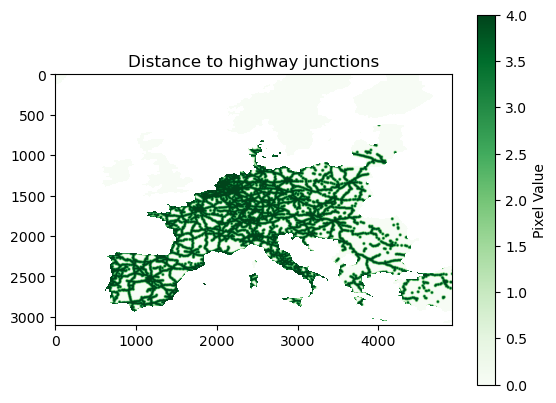

In [8]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
   
file_path = 'C:/BO Soudal/Data/Rasters/Aligned_rasters/highway_junction_distance_align.tif'
with rasterio.open(file_path) as src:
    raster_data = src.read(1)
    nodata = -3.40282347e+38
   
    mask = np.isclose(raster_data, nodata)
    highway_raster = np.ma.masked_array(raster_data, mask)
    
plt.imshow(highway_raster, cmap = 'Greens')
plt.colorbar(label = 'Pixel Value')
plt.title('Distance to highway junctions')
plt.show()

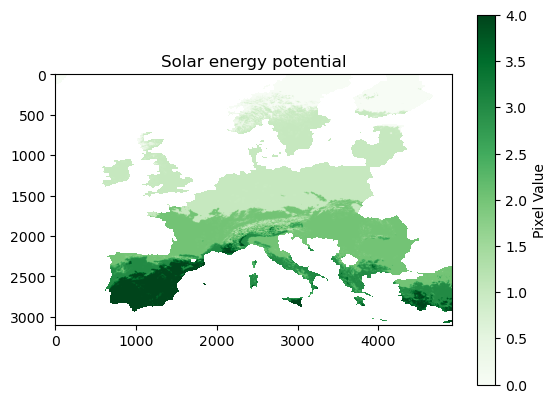

In [9]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
   
file_path = 'C:/BO Soudal/Data/Rasters/Aligned_rasters/solar_energy_align.tif'
with rasterio.open(file_path) as src:
    raster_data = src.read(1)
    nodata = -3.40282347e+38
   
    mask = np.isclose(raster_data, nodata)
    solar_raster = np.ma.masked_array(raster_data, mask)
    
plt.imshow(solar_raster, cmap = 'Greens')
plt.colorbar(label = 'Pixel Value')
plt.title('Solar energy potential')
plt.show()

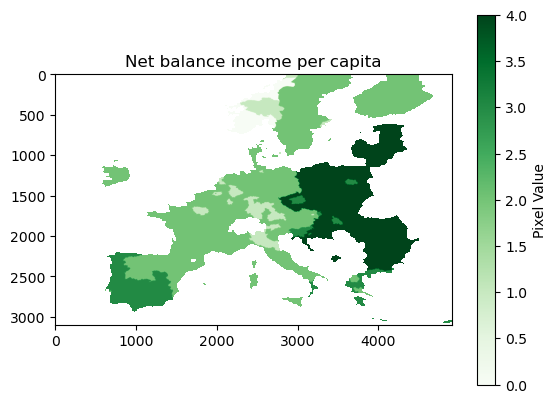

In [10]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
   
file_path = 'C:/BO Soudal/Data/Rasters/Aligned_rasters/Labour_cost_align.tif'
with rasterio.open(file_path) as src:
    raster_data = src.read(1)
    nodata = -3.40282347e+38
   
    mask = np.isclose(raster_data, nodata)
    europercapita_raster = np.ma.masked_array(raster_data, mask)
    
plt.imshow(europercapita_raster, cmap = 'Greens')
plt.colorbar(label = 'Pixel Value')
plt.title('Net balance income per capita')
plt.show()

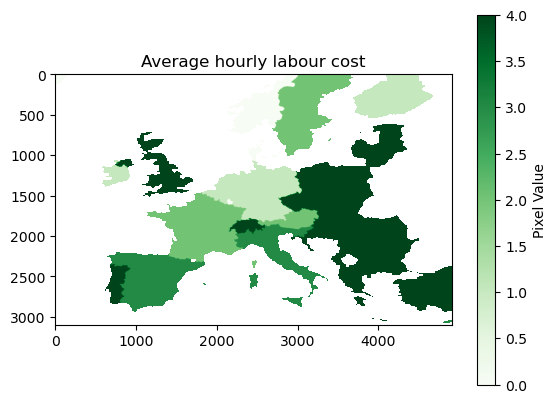

In [11]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
   
file_path = 'C:/BO Soudal/Data/Rasters/Aligned_rasters/labour_cost_hour_align4.tif'
with rasterio.open(file_path) as src:
    raster_data = src.read(1)
    nodata = -3.40282347e+38
   
    mask = np.isclose(raster_data, nodata)
    hourlylabour_raster = np.ma.masked_array(raster_data, mask)
    
plt.imshow(hourlylabour_raster, cmap = 'Greens')
plt.colorbar(label = 'Pixel Value')
plt.title('Average hourly labour cost')
plt.show()

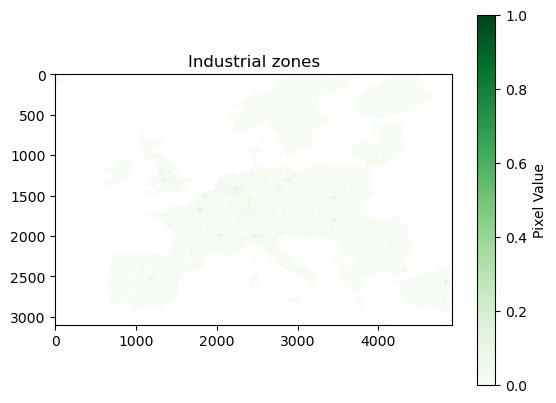

In [12]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
   
file_path = 'C:/BO Soudal/Data/Rasters/Aligned_rasters/Industrial_zones_align.tif'
with rasterio.open(file_path) as src:
    raster_data = src.read(1)
    nodata = -3.40282347e+38
   
    mask = np.isclose(raster_data, nodata)
    industrial_raster = np.ma.masked_array(raster_data, mask)
    
plt.imshow(industrial_raster, cmap = 'Greens')
plt.colorbar(label = 'Pixel Value')
plt.title('Industrial zones')
plt.show()

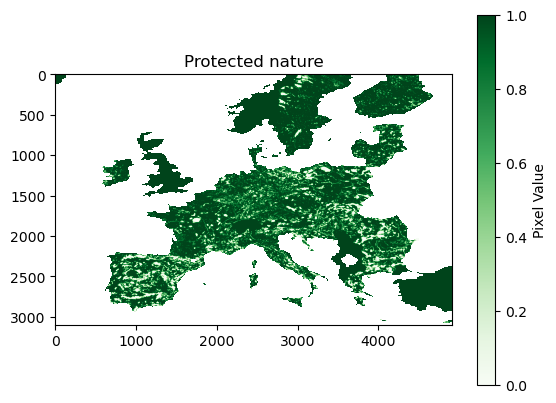

In [13]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
   
file_path = 'C:/BO Soudal/Data/Rasters/Aligned_rasters/Protected_nature_align.tif'
with rasterio.open(file_path) as src:
    raster_data = src.read(1)
    nodata = -3.40282347e+38
   
    mask = np.isclose(raster_data, nodata)
    nature_raster = np.ma.masked_array(raster_data, mask)
    
plt.imshow(nature_raster, cmap = 'Greens')
plt.colorbar(label = 'Pixel Value')
plt.title('Protected nature')
plt.show()

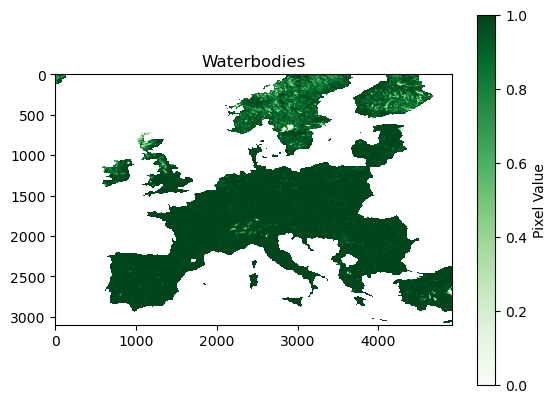

In [14]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
   
file_path = 'C:/BO Soudal/Data/Rasters/Aligned_rasters/Waterbodies_align.tif'
with rasterio.open(file_path) as src:
    raster_data = src.read(1)
    nodata = -3.40282347e+38
   
    mask = np.isclose(raster_data, nodata)
    waterbodies_raster = np.ma.masked_array(raster_data, mask)
    
plt.imshow(waterbodies_raster, cmap = 'Greens')
plt.colorbar(label = 'Pixel Value')
plt.title('Waterbodies')
plt.show()

C:\software\Anaconda\envs\Soudal\Lib\site-packages\numpy\ma\core.py:1020: RuntimeWarning: overflow encountered in add
  result = self.f(da, db, *args, **kwargs)
C:\software\Anaconda\envs\Soudal\Lib\site-packages\numpy\ma\core.py:1020: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)


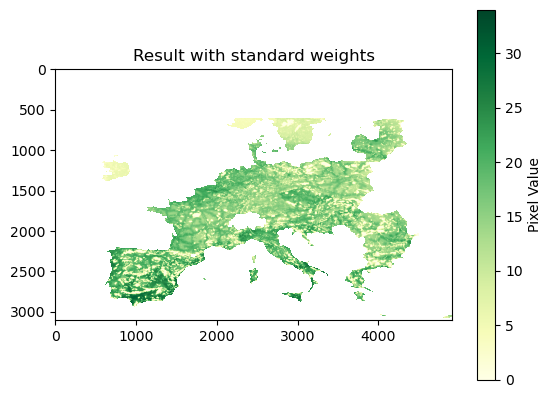

In [15]:
import pandas as pd
from geocube.api.core import make_geocube
from geocube.rasterize import rasterize_image
from functools import partial

from rasterio.enums import MergeAlg
    
merge_test = jobvacancy_raster + population_raster + unemployment_raster + education_raster + harbour_raster + highway_raster + railway_raster + solar_raster + europercapita_raster + hourlylabour_raster

raster_exclude = merge_test * waterbodies_raster * nature_raster

plt.imshow(raster_exclude, cmap='YlGn')
plt.colorbar(label='Pixel Value')
plt.title('Result with standard weights')
plt.show()

import rasterio
from rasterio.transform import from_origin
from rasterio.enums import Resampling


output_file = 'C:/BO Soudal/Data/Rasters/Result rasters/result_standard_weights.tif'

# Get metadata from one of the input raster files (assuming all have the same metadata)
with rasterio.open('C:/BO Soudal/Data/Rasters/Aligned_rasters/population_align4.tif') as src:
    profile = src.profile

# Update metadata if necessary 
profile.update(
    dtype=rasterio.float64,  
    count=1,  
    compress='lzw',  #
    nodata=-3.40282347e+38,  
)

# Create a new raster file for writing
with rasterio.open(output_file, 'w', **profile) as dst:
    
    dst.write(raster_exclude.filled(), 1)

    # Optionally, write affine transformation and coordinate reference system
    # dst.write_transform(from_origin(x, y, pixel_size, pixel_size)) 
    # dst.write_crs("EPSG:4326")  

    # Optionally, apply resampling method
    dst.build_overviews([2, 4, 8], Resampling.average)

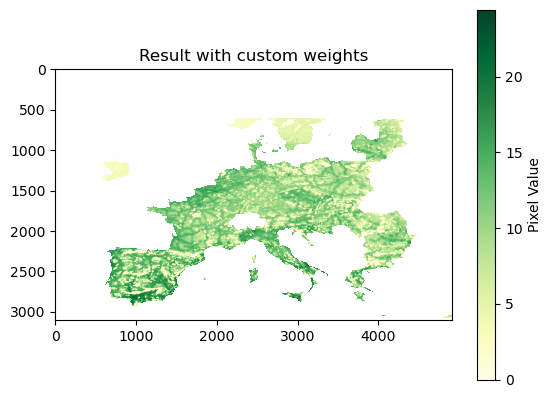

In [16]:
import pandas as pd
from geocube.api.core import make_geocube
from geocube.rasterize import rasterize_image
from functools import partial

from rasterio.enums import MergeAlg
    
merge_test = (jobvacancy_raster * 0.6) + (population_raster * 1) + (unemployment_raster * 0.8) + (education_raster * 0.4) + (harbour_raster * 0.8) + (highway_raster * 1) + (railway_raster * 0.6) + (solar_raster * 0.6) + (europercapita_raster * 0.4) + (hourlylabour_raster * 0.8)

raster_exclude = merge_test * waterbodies_raster * nature_raster

plt.imshow(raster_exclude, cmap='YlGn')
plt.colorbar(label='Pixel Value')
plt.title('Result with custom weights')
plt.show()

import rasterio
from rasterio.transform import from_origin
from rasterio.enums import Resampling


output_file = 'C:/BO Soudal/Data/Rasters/Result rasters/result_custom_weights.tif'

# Get metadata from one of the input raster files (assuming all have the same metadata)
with rasterio.open('C:/BO Soudal/Data/Rasters/Aligned_rasters/population_align4.tif') as src:
    profile = src.profile

# Update metadata if necessary 
profile.update(
    dtype=rasterio.float64,  
    count=1,  
    compress='lzw',  #
    nodata=-3.40282347e+38,  
)

# Create a new raster file for writing
with rasterio.open(output_file, 'w', **profile) as dst:
    
    dst.write(raster_exclude.filled(), 1)

    # Optionally, write affine transformation and coordinate reference system
    # dst.write_transform(from_origin(x, y, pixel_size, pixel_size)) 
    # dst.write_crs("EPSG:4326")  

    # Optionally, apply resampling method
    dst.build_overviews([2, 4, 8], Resampling.average)

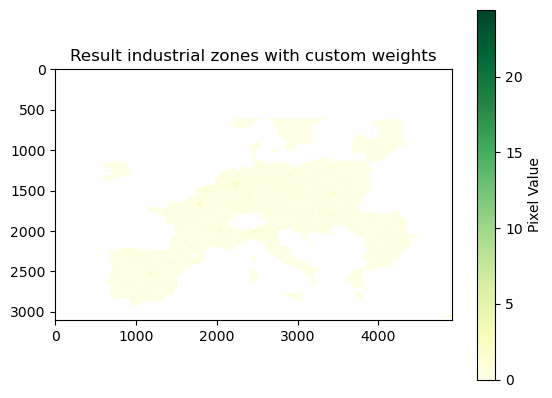

In [17]:
import pandas as pd
from geocube.api.core import make_geocube
from geocube.rasterize import rasterize_image
from functools import partial

from rasterio.enums import MergeAlg
    
merge_test = (jobvacancy_raster * 0.6) + (population_raster * 1) + (unemployment_raster * 0.8) + (education_raster * 0.4) + (harbour_raster * 0.8) + (highway_raster * 1) + (railway_raster * 0.6) + (solar_raster * 0.6) + (europercapita_raster * 0.4) + (hourlylabour_raster * 0.8)

raster_exclude = merge_test * waterbodies_raster * nature_raster * industrial_raster

plt.imshow(raster_exclude, cmap='YlGn')
plt.colorbar(label='Pixel Value')
plt.title('Result industrial zones with custom weights')
plt.show()

import rasterio
from rasterio.transform import from_origin
from rasterio.enums import Resampling


output_file = 'C:/BO Soudal/Data/Rasters/Result rasters/result_custom_weights_industrial_zones.tif'

# Get metadata from one of the input raster files (assuming all have the same metadata)
with rasterio.open('C:/BO Soudal/Data/Rasters/Aligned_rasters/population_align4.tif') as src:
    profile = src.profile

# Update metadata if necessary 
profile.update(
    dtype=rasterio.float64,  
    count=1,  
    compress='lzw',  #
    nodata=-3.40282347e+38,  
)

# Create a new raster file for writing
with rasterio.open(output_file, 'w', **profile) as dst:
    
    dst.write(raster_exclude.filled(), 1)

    # Optionally, write affine transformation and coordinate reference system
    # dst.write_transform(from_origin(x, y, pixel_size, pixel_size)) 
    # dst.write_crs("EPSG:4326")  

    # Optionally, apply resampling method
    dst.build_overviews([2, 4, 8], Resampling.average)

C:\Users\daand\AppData\Local\Temp\ipykernel_12720\545506464.py:14: DtypeWarning: Columns (6,10,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  customer_orders_points_07052024 = pd.read_csv("C:/BO Soudal/Data/Model0data/Customer_orders_points_07052024.csv")
C:\Users\daand\AppData\Local\Temp\ipykernel_12720\545506464.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  producing_plants['Country'] = producing_plants['Country'].map(dict(zip(country_lookup_producing['Country'], country_lookup_producing['Country_Code'])))
C:\Users\daand\AppData\Local\Temp\ipykernel_12720\545506464.py:133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

{0: {0: 0, 16: 0.004239429905878272, 12: 0.005746977581639335, 14: 0.005888570572897887, 1: 0.006390536830443371, 9: 0.006390536830443371, 7: 0.008478859811756544, 13: 0.008775171302225215, 11: 0.010607678721458059, 15: 0.011882045303765798, 21: 0.015502417380436218, 20: 0.015822987202621226, 3: 0.016253526924099433, 18: 0.018265255710779978, 4: 0.019016472182998834, 2: 0.019846217935362818, 19: 0.020704863686003227, 17: 0.021193125080378388, 8: 0.024091834666501964, 6: 0.03334534846109558, 5: 0.03723834495551845, 10: 0.038794570340016196}, 1: {1: 0, 14: 0.0005027732766082139, 9: 0.0010055465532164277, 13: 0.003195778808920549, 12: 0.003444921127266084, 11: 0.004487897171552333, 15: 0.005506284570792949, 16: 0.005728480031088773, 0: 0.006390536830443371, 7: 0.006390536830443371, 20: 0.009561815405867976, 3: 0.009999942116191476, 21: 0.010020231043795545, 18: 0.011889198868245306, 2: 0.013472714682702985, 4: 0.013478239707248934, 19: 0.014322306844131102, 17: 0.014811594552286674, 8: 0.

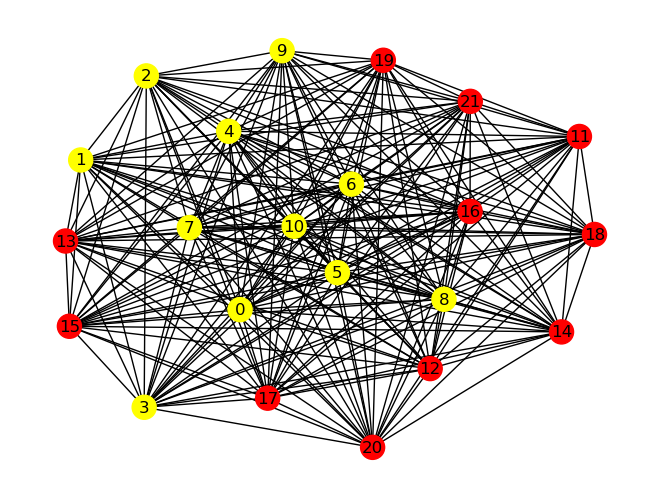

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import pdist, squareform
import igraph as ig
import geopy.distance
import folium
from math import radians, cos, sin, asin, sqrt
import networkx as nx
from geopy.distance import geodesic


# Load your dataset and remove NA values
customer_orders_points_07052024 = pd.read_csv("C:/BO Soudal/Data/Model0data/Customer_orders_points_07052024.csv")

customer_id = customer_orders_points_07052024['POSTCODE'].dropna()
order_quantity = customer_orders_points_07052024['Quantity_Delivered'].dropna()
latitude = customer_orders_points_07052024['y'].dropna()
latitude = latitude[(latitude <= 90) & (latitude >= -90)]

longitude = customer_orders_points_07052024['x'].dropna()
longitude = longitude[(longitude <= 90) & (longitude >= -90)]

min_length = min(len(longitude), len(latitude))  # min(len(longitude), len(latitude)) or any other criteria

# Standardize all vector lengths
customer_id = customer_id.head(min_length)
order_quantity = order_quantity.head(min_length)
latitude = latitude.head(min_length)
longitude = longitude.head(min_length)

# Create DataFrame from customer order data
customer_data = pd.DataFrame({
    'Customer': customer_id,
    'Latitude': latitude,
    'Longitude': longitude,
    'Order_quantity': order_quantity
})

from sklearn.cluster import DBSCAN

# Create grouped dataset
grouped_data = customer_data.groupby(['Latitude', 'Longitude', 'Order_quantity']).agg(Num_Customers=('Customer', 'nunique')).reset_index()

# Combine orders per location
combined_orders = grouped_data.groupby(['Latitude', 'Longitude']).agg(
    Total_Order_Quantity=('Order_quantity', 'sum'),
    Total_Num_Customers=('Num_Customers', 'sum')
).reset_index()

# Perform clustering using DBSCAN on combined_orders dataset based on geoposition only
eps = 0.62  # Adjust epsilon (neighborhood distance) as needed
minPts = 39  # Adjust minPts (minimum number of points in a cluster) as needed

dbscan = DBSCAN(eps=eps, min_samples=minPts, metric='euclidean')
dbscan_result = dbscan.fit_predict(combined_orders[['Longitude', 'Latitude']])

# Assign cluster labels to data points
combined_orders['Cluster'] = dbscan_result

# Calculate cluster centers
cluster_centers_df = combined_orders.groupby('Cluster').agg(
    Longitude=('Longitude', 'mean'),
    Latitude=('Latitude', 'mean'),
    Total_Order_Quantity=('Total_Order_Quantity', 'sum'),
    Count=('Latitude', 'size')
).reset_index()

cluster_centers_df['ID'] = np.arange(len(cluster_centers_df)) + 1

customer_nodes = cluster_centers_df[['ID', 'Total_Order_Quantity', 'Latitude', 'Longitude']]


import pandas as pd

# Create a dataframe
df = pd.DataFrame({
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12],
    'Country': ["Portugal", "Spain", "Italy", "France", "Belgium", "Latvia", "Poland", "Portugal", "Slovenia", "Spain", "Turkey"],
    'City': ["Lissabon", "Alovera", "Cologno Monzese", "Blyes", "Turnhout", "Dobele", "Pionki", "Lissabon", "Srpenica", "Alovera", "Tuzla, Istanbul"],
    'Plant_type': ["Receiving plant", "Receiving plant", "Receiving plant", "Receiving plant", "Producing plant", "Producing plant", "Producing plant", "Producing plant", "Producing plant", "Producing plant", "Producing plant"],
    'ZIP_code': ["2710-207", "19208", "20093", "1150", "2300", "3701", "26-670", "2710-207", "5224", "19208", "34956"],
    'Receiving_plant': [2200, 1900, 2000, 1800, None, None, None, None, None, None, None],
    'X_coordinate': [-9.369216, -3.243162431, 9.281575673, 5.261173337, 4.928540898, 23.30237845, 21.45811508, -9.369216, 13.5166732, -3.243162431, 29.36691489],
    'Y_coordinate': [38.757301, 40.57675934, 45.54113003, 45.83747369, 51.29525785, 56.62518423, 51.46902482, 38.757301, 46.28409136, 40.57675934, 40.8858807],
    'Geometry': ["POINT (-9.36922 38.75730)", "POINT (-3.24316 40.57676)", "POINT (9.28158 45.54113)", "POINT (5.26117 45.83747)", "POINT (4.92854 51.29526)", "POINT (23.30238 56.62518)", "POINT (21.45812 51.46902)", "POINT (-9.36922 38.75730)", "POINT (13.51667 46.28409)", "POINT (-3.24316 40.57676)", "POINT (29.36691 40.88588)"]
})

# Load in the interplant orders
Interplant_Orders_2023_2 = pd.read_csv("C:/BO Soudal/Data/Model0data/Interplant_Orders_2023_2.csv")

# Assign an easier name to the variable
Order_Ref = Interplant_Orders_2023_2

# Split the aggregated data into producing plants and receiving plants
producing_plants = df[df['Plant_type'] == "Producing plant"]
receiving_plants = df[df['Plant_type'] == "Receiving plant"]

# Create a new dataframe with the desired structure
new_df = pd.DataFrame({
    'ID': df['City'] + " plant " + df['ID'].astype(str),
    'Total_Quantity': df['Receiving_plant'],
    'Latitude': df['Y_coordinate'],
    'Longitude': df['X_coordinate']
})

# Convert Total_Quantity to integer
new_df['Total_Quantity'] = new_df['Total_Quantity'].astype(pd.Int64Dtype())

# Group the data by warehouse and calculate both total capacity and frequency
warehouse_capacity = Order_Ref.groupby('Producing_Plant').agg(
    Total_Capacity=('Quantity_Delivered', 'sum'),
    Frequency=('Producing_Plant', 'count')
).reset_index()

# Create a lookup table mapping country names to country codes
country_lookup_producing = pd.DataFrame({
    'Country': ["Belgium", "Latvia", "Poland", "Portugal", "Slovenia", "Spain", "Turkey"],
    'Country_Code': ["BE", "LV", "PL", "PT", "SI", "ES", "TR"]
})

# Create a lookup table mapping country names to country codes
country_lookup_receiving = pd.DataFrame({
    'Country': ["Lissabon", "Alovera", "Cologno Monzese", "Byles"],
    'Country_Code': ["PT", "ES", "IT", "FR"]
})


# Replace the country names with country codes in the producing dataframe
producing_plants['Country'] = producing_plants['Country'].map(dict(zip(country_lookup_producing['Country'], country_lookup_producing['Country_Code'])))

# Replace the country names with country codes in the receiving dataframe
receiving_plants['Country'] = ["PT", "ES", "IT", "FR"]

# Grouping by Producing_Plant and Receiving_Plant, and summarizing the Quantity_Delivered and Order_Ref
flow_data = Order_Ref.groupby(['Producing_Plant', 'Receiving_Plant']).agg(
    Total_Quantity=('Quantity_Delivered', 'sum'),
    Frequency=('Producing_Plant', 'count')
).reset_index()

# Arranging the data by frequency in descending order
flow_data = flow_data.sort_values(by=['Producing_Plant'])

# Assigning country codes and coordinates
flow_data['Country'] = ["BE", "PL", "GB", "BE", "BE", "NL", "DE", "PL", "TR", "SI", "PL", "BE", "NL"]
flow_data['X_coordinate'] = [51.3377, 52.3753, 52.6043, 51.1913, 51.1055, 51.2518, 51.0625, 51.4583, 40.6295, 46.2914, 51.4583, 51.1055, 51.5064]
flow_data['Y_coordinate'] = [4.9345, 20.6860, 1.6485, 5.3966, 3.8589, 5.6885, 6.9419, 21.4481, 30.6428, 13.4568, 21.4481, 3.8589, 4.2572]
flow_data.columns = ["Producing_Plant", "Receiving_Plant", "Total Quantity", "Frequency", "Country", "Latitude", "Longitude"]

# Assigning IDs
flow_data['ID'] = ["Turnhout plant 1000", "Dąbrówka plant 1030", "Great_Britain plant 1100", "Pelt plant 1400", "Gent plant 1500",
                   "Weert plant 1600", "Leverkussen plant 1700", "Pionki plant 2400", "Turkey Plant 5200", " Srpenica plant 5600",
                   "Pionki plant 5900", "Gent plant 6700", "Bergen_op_zoom plant 8700"]

# Selecting specific columns
logistical_flow_nodes = flow_data[['ID', 'Total Quantity', 'Latitude', 'Longitude']]
logistical_nodes = new_df[['ID', 'Latitude', 'Longitude']]

# Given plant dataset
plant_dataset = logistical_nodes

# Given customer dataset
customer_dataset = pd.DataFrame({
    'ID': cluster_centers_df['ID'],
    'Longitude': cluster_centers_df['Longitude'],
    'Latitude': cluster_centers_df['Latitude']
})

# Combine plant and customer datasets
combined_dataset = pd.concat([plant_dataset, customer_dataset], ignore_index=True)

# Calculate distances between each pair of points
distances = squareform(pdist(combined_dataset[['Longitude', 'Latitude']]) / 1000)

# Create a graph object
g = nx.from_numpy_array(distances, create_using=nx.Graph())

# Assign colors to nodes (plants: yellow, customers: red)
node_colors = ['yellow'] * len(plant_dataset) + ['red'] * len(customer_dataset)

# Plot the graph with different colors for plant and customer nodes
nx.draw(g, node_color=node_colors, with_labels=True)

# Calculate the shortest paths from each plant to each customer
shortest_paths = dict(nx.all_pairs_dijkstra_path_length(g, weight='weight'))

# Print shortest paths matrix
print(shortest_paths)

# Calculate distances from each customer to all plant nodes
customer_to_plant_distances = distances[len(plant_dataset):, :len(plant_dataset)]

# Find the plant node that minimizes the distance for each customer
nearest_plant_indices = np.argmin(customer_to_plant_distances, axis=1)

# Objective function
def objective_function(coords, specified_nodes):
    # Extract latitude and longitude
    lon = coords["Longitude"]
    lat = coords["Latitude"]

    # Calculate total distances to specified nodes
    total_distance_to_specified_nodes = sum(geodesic((lat, lon), (combined_dataset.loc[node, 'Latitude'], combined_dataset.loc[node, 'Longitude'])).kilometers
                                            for node in specified_nodes)

    # Return the sum of distances to specified nodes
    return total_distance_to_specified_nodes

# Grid Search
lon_range = np.linspace(combined_dataset['Longitude'].min(), combined_dataset['Longitude'].max(), num=100)
lat_range = np.linspace(combined_dataset['Latitude'].min(), combined_dataset['Latitude'].max(), num=100)
grid_search = pd.DataFrame([(lon, lat) for lon in lon_range for lat in lat_range], columns=['Longitude', 'Latitude'])

# Specify nodes for the objective function
specified_nodes = range(22)  # Example: specify which nodes you want to connect to

# Calculate objective function values for each grid point
grid_search['Objective'] = grid_search.apply(lambda row: objective_function(row, specified_nodes), axis=1)

# Find the coordinates of the new position that minimize the objective function
optimal_coords = grid_search.loc[grid_search['Objective'].idxmin(), ['Longitude', 'Latitude']]

# Coordinates of the new position that minimize the total distance
new_position_longitude = optimal_coords['Longitude']
new_position_latitude = optimal_coords['Latitude']

# Convert latitude and longitude to numeric
latitude_NW = float(new_position_latitude)
longitude_NW = float(new_position_longitude)

# Sample data
customers = cluster_centers_df[['ID', 'Latitude', 'Longitude']]
warehouses = logistical_nodes[['ID', 'Latitude', 'Longitude']]
new_warehouse = pd.DataFrame({
    'ID': ['New warehouse'],
    'Latitude': [latitude_NW],
    'Longitude': [longitude_NW]
})

# Create a folium map
m = folium.Map(location=[latitude_NW, longitude_NW], zoom_start=10)

# Add circle markers for customers
for idx, row in customers.iterrows():
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']], radius=5, color='blue', fill=True, fill_color='blue', fill_opacity=0.6, tooltip=row['ID']).add_to(m)

# Add circle markers for existing warehouses
for idx, row in warehouses.iterrows():
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']], radius=5, color='red', fill=True, fill_color='red', fill_opacity=0.6, tooltip=row['ID']).add_to(m)

# Add circle marker for new warehouse
folium.CircleMarker(location=[latitude_NW, longitude_NW], radius=5, color='green', fill=True, fill_color='green', fill_opacity=0.6, tooltip='New Warehouse').add_to(m)

# Add layers control
folium.LayerControl().add_to(m)

# Add title and legend
title_html = '<h3 style="text-align: center;">Scenario 1</h3>'
legend_html = """
<div id="legend" class="info">
    <h4>Legend</h4>
    <div class="legend-item"><i style="background: blue"></i>Central Customer Clusters</div>
    <div class="legend-item"><i style="background: red"></i>Existing Warehouses</div>
    <div class="legend-item"><i style="background: green"></i>Search area for new location</div>
</div>
"""
m.get_root().html.add_child(folium.Element(title_html), name='title')
m.get_root().html.add_child(folium.Element(legend_html), name='legend')

# Display the map
m